In [41]:
import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import locale
from dateutil import tz
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
from scipy import sparse
pd.set_option('display.max_columns', None)

In [42]:
df = pd.read_csv("cosmetics_product_reviews.csv")
df = df[['review_date','author','brand_name','product_title','price','review_rating','product_rating']]
df

,review_date,author,brand_name,product_title,price,review_rating,product_rating
0,2021-01-23 15:17:18,Ashton Dsouza,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1
1,2020-09-07 15:30:42,Amrit Neelam,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1
2,2020-11-13 12:24:14,Sanchi Gupta,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,4.0,4.1
3,2020-06-14 11:56:50,Ruchi Shah,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,3.0,4.1
4,2020-12-22 15:24:35,Sukanya Sarkar,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,2.0,4.1
...,...,...,...,...,...,...,...
61279,2021-04-12 13:28:41,Radhesh,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3
61280,2021-04-12 11:47:07,Shalini Sirohi,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3
61281,2021-04-12 10:58:34,Sana kanted,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3
61282,2021-04-11 21:44:55,neeru chouhan,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3


In [43]:
# Pre-processing Date.Time
df['review_date'] = pd.to_datetime(df['review_date'])
bins1 = pd.to_datetime(['00:00:00', '12:00:00', '18:00:00', '23:59:59'], format='%H:%M:%S')
df['Jam'] = df['review_date'].dt.hour
df['Waktu'] = pd.cut(df['Jam'], bins=[0, 12, 18, 24], labels=['Pagi', 'Siang', 'Malam'])

# Set timezone to UTC
df['review_date'] = df['review_date'].dt.tz_localize(tz.UTC)

# Convert to desired timezone (e.g. Asia/Jakarta)
df['review_date'] = df['review_date'].dt.tz_convert(tz.gettz('Asia/Jakarta'))

# Extract day name, month name, and year
df['Hari'] = df['review_date'].dt.day_name()
df['Bulan'] = df['review_date'].dt.month_name()
df['Tahun'] = df['review_date'].dt.year

In [44]:
df.head()

,review_date,author,brand_name,product_title,price,review_rating,product_rating,Jam,Waktu,Hari,Bulan,Tahun
0,2021-01-23 22:17:18+07:00,Ashton Dsouza,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1,15,Siang,Saturday,January,2021
1,2020-09-07 22:30:42+07:00,Amrit Neelam,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1,15,Siang,Monday,September,2020
2,2020-11-13 19:24:14+07:00,Sanchi Gupta,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,4.0,4.1,12,Pagi,Friday,November,2020
3,2020-06-14 18:56:50+07:00,Ruchi Shah,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,3.0,4.1,11,Pagi,Sunday,June,2020
4,2020-12-22 22:24:35+07:00,Sukanya Sarkar,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,2.0,4.1,15,Siang,Tuesday,December,2020


In [45]:
df.to_csv('clean.csv')
df = df.dropna()
df.columns

Index(['review_date', 'author', 'brand_name', 'product_title', 'price',
       'review_rating', 'product_rating', 'Jam', 'Waktu', 'Hari', 'Bulan',
       'Tahun'],
      dtype='object')

<Axes: xlabel='review_rating'>

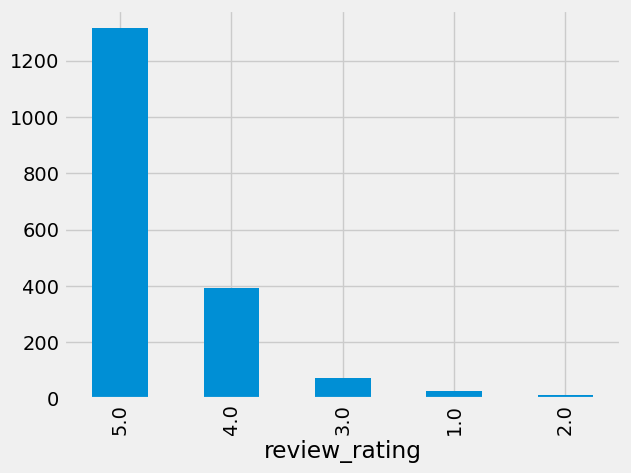

In [61]:
df['review_rating'].value_counts().rename('review_rating').plot(kind='bar')

In [47]:
pd.DataFrame(df['brand_name'].value_counts())

,count
brand_name,
Nykaa Cosmetics,17069
Kay Beauty,13318
Lakme,6739
Maybelline New York,6545
Herbal Essences,5936
L'Oreal Paris,4084
NYX Professional Makeup,2827
Nykaa Naturals,1372
Nivea,753


In [48]:
pd.DataFrame(df['product_title'].value_counts())

,count
product_title,
Kay Beauty Waterproof 24 Hour Kajal - Spade - Black,783
Kay Beauty Nail Nourish Nail Enamel Polish,779
Kay Beauty Metallic Eyeshadow Stick Pencil,778
Kay Beauty Matteinee Matte Lip Crayon Lipstick,776
Kay Beauty Matte Blush,776
...,...
Get Party Ready With Kay Beauty Lip Liner - Dance Off & Matte Lipstick - Premier,1
Kay Beauty Pastel Perfection Nail Enamel Combo,1
Kay Beauty Nail Nourish Nail Emanel Combo - Carnival & Wine Berry,1


In [49]:
df['author'].value_counts().rename('author')

author
Anonymous             150
Priyanka Prakash       99
X Y                    87
Damon Salvatore        81
Priya Pawar            76
                     ... 
Mythri Rao              1
Nitisha S               1
akriti                  1
Gagu                    1
Soujanya Garlapati      1
Name: author, Length: 40348, dtype: int64

In [50]:
pd.DataFrame(df.author.value_counts()).tail()

,count
author,
Mythri Rao,1
Nitisha S,1
akriti,1
Gagu,1
Soujanya Garlapati,1


In [51]:
counts = df['author'].value_counts()

to_remove = counts[counts < 25].index.tolist()

df.drop(df[df['author'].isin(to_remove)].index, inplace=True)

[Text(0, 0, 'Kay Beauty Matte Drama Long Stay Lipstick'),
 Text(1, 0, 'Kay Beauty Matte Compact'),
 Text(2, 0, 'Lakme Absolute Kohl Ultimate The Gelato Collection'),
 Text(3, 0, 'Kay Beauty Illuminating Highlighter'),
 Text(4, 0, 'Kay Beauty Hd Liquid Concealer'),
 Text(5, 0, 'Kay Beauty Eyeshadow Palette'),
 Text(6, 0, 'Lakme Absolute Plush Matte Lip Crayon'),
 Text(7, 0, 'Kay Beauty Creme Blush'),
 Text(8, 0, 'Nykaa Matte to Last! Mini Metallic Liquid Lipstick and Eyeshadow'),
 Text(9, 0, 'Kay Beauty Colour Correcting Primer')]

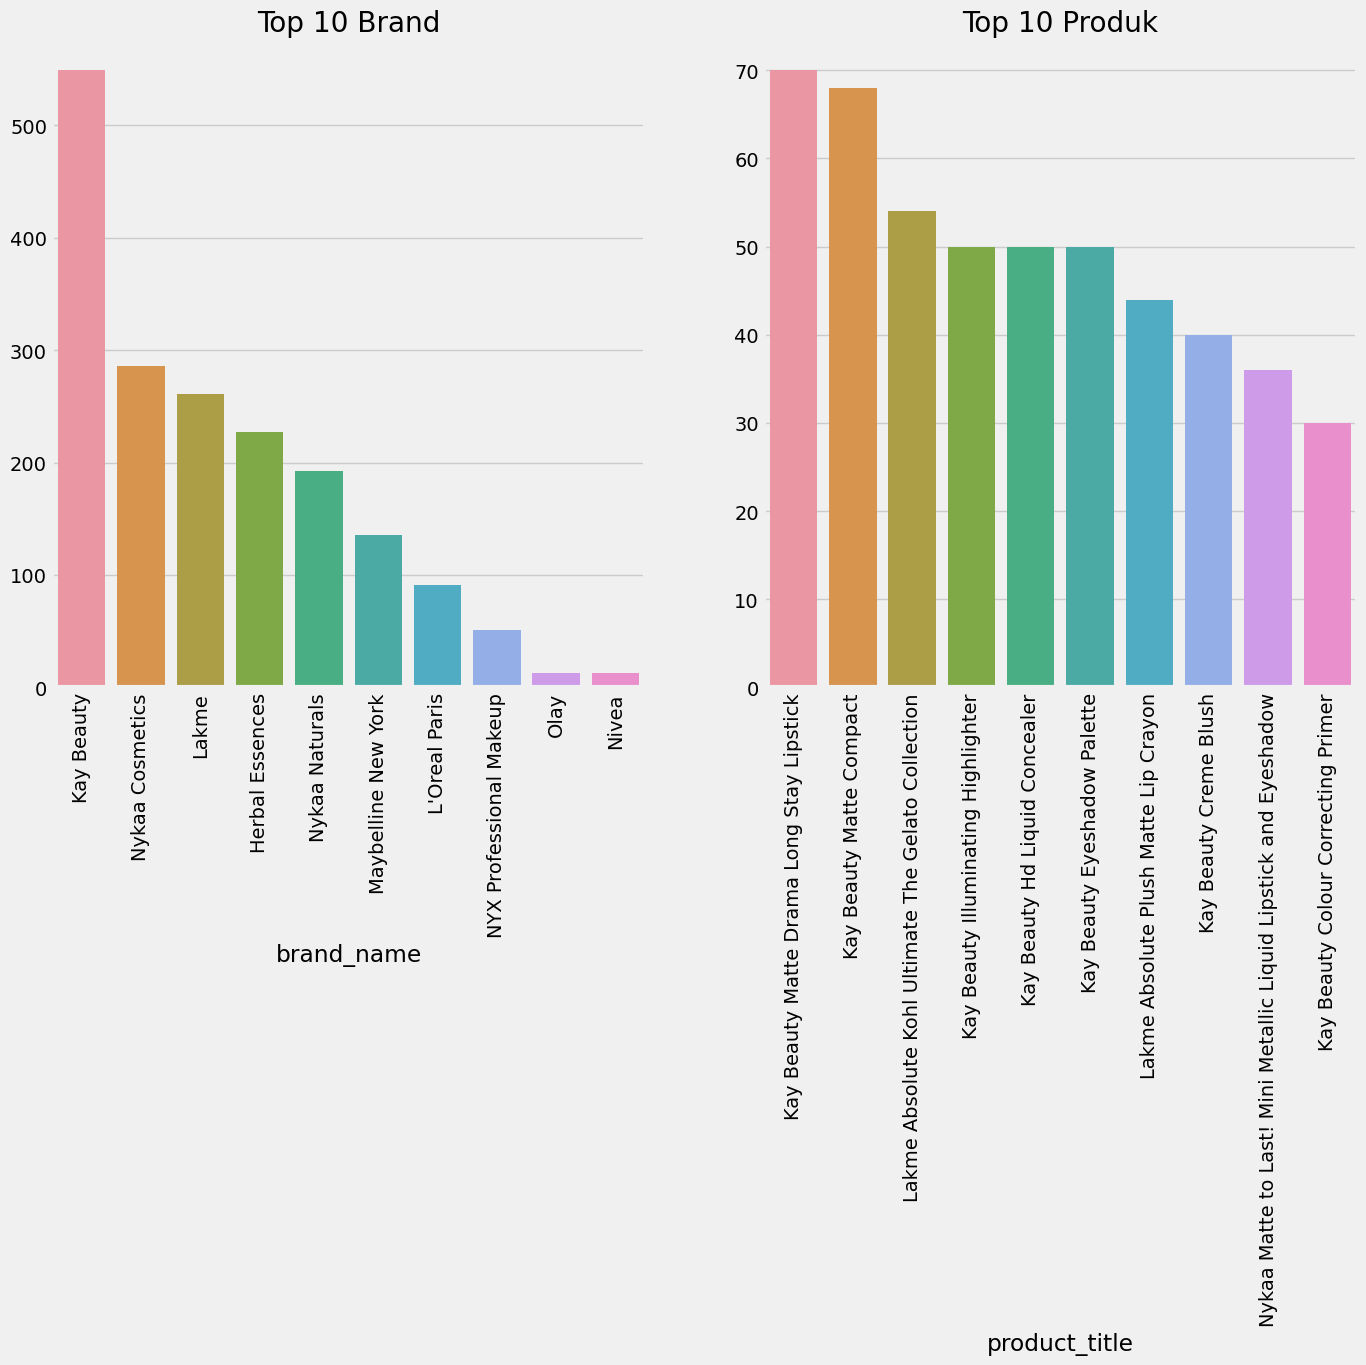

In [52]:
# Visualisasi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x = df['brand_name'].value_counts()[:10].index,
            y = df['brand_name'].value_counts()[:10].values,ax = ax1)
ax1.set_title('Top 10 Brand')
ax1.set_xticklabels(df['brand_name'].value_counts()[:10].index,rotation=90)

sns.barplot(x = df['product_title'].value_counts()[:10].index,
            y = df['product_title'].value_counts()[:10].values, ax = ax2)
ax2.set_title('Top 10 Produk')
ax2.set_xticklabels(df['product_title'].value_counts()[:10].index,rotation=90)

Text(0.5, 1.0, 'Total Review Product per Jam')

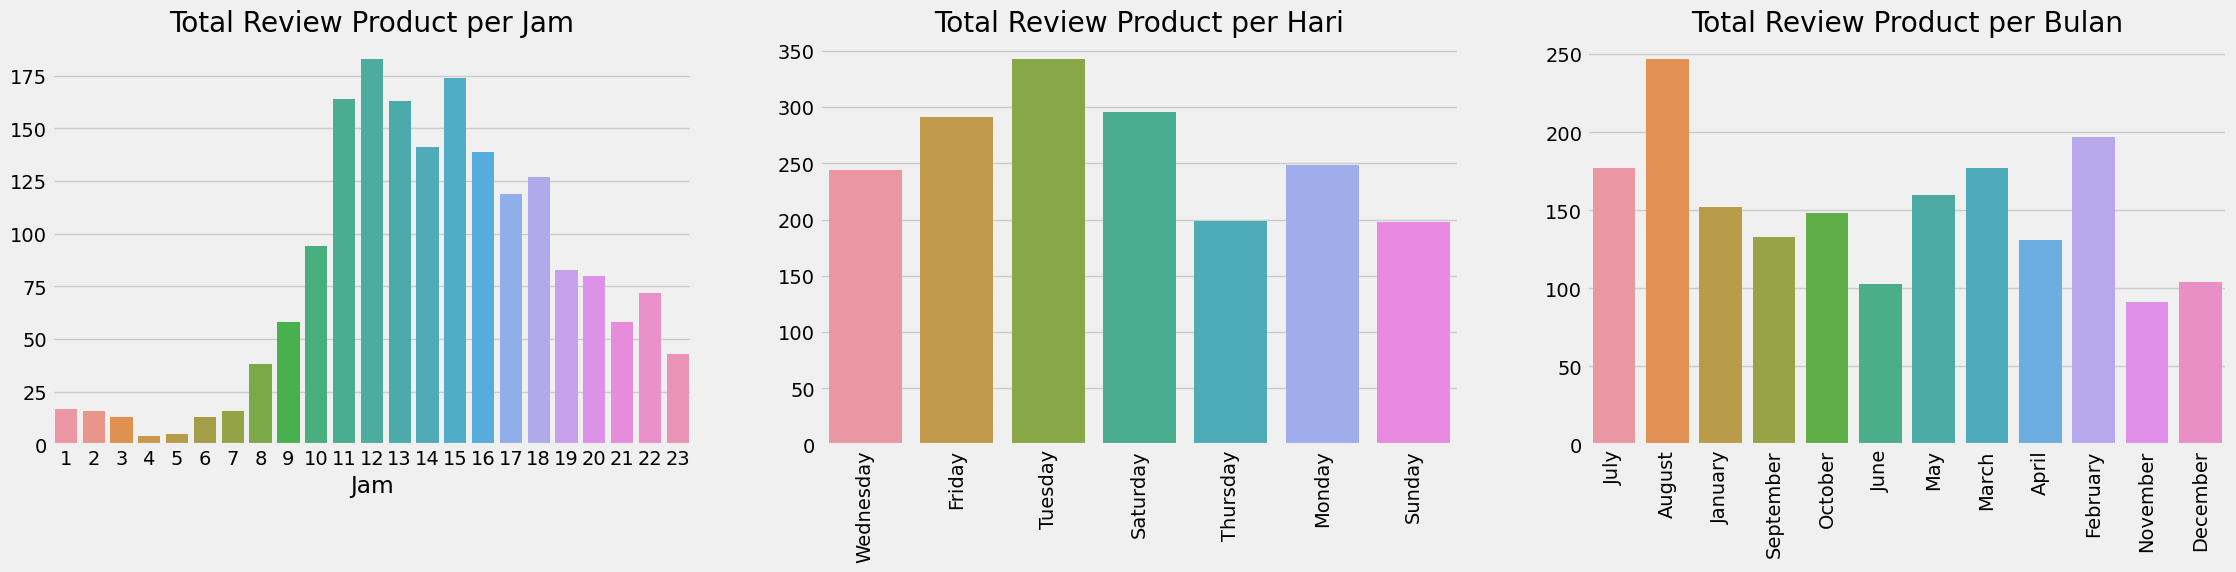

In [53]:
df_hari = df.groupby('Hari')['author'].count()
df_hari = pd.concat([df_hari.iloc[4:], df_hari.iloc[:4]])

df_bulan = df.groupby('Bulan')['author'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

df_jam = df.groupby('Jam')['author'].count()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))

sns.barplot(x = df['Hari'].unique(), y = df_hari.values, ax = ax2)
ax2.set_title('Total Review Product per Hari')
ax2.set_xticklabels(df['Hari'].value_counts()[:10].index,rotation=90)

sns.barplot(x = df['Bulan'].unique(), y = df_bulan.values,ax = ax3)
ax3.set_title('Total Review Product per Bulan')
ax3.set_xticklabels(df['Bulan'].value_counts().index,rotation=90)

sns.barplot(x = df_jam.index, y = df_jam.values, ax = ax1)
ax1.set_title('Total Review Product per Jam')
# ax1.set_xticklabels(df['jam'].value_counts().index,rotation=90)

In [54]:
item_count_pivot = df.pivot_table(index='author',columns='product_title', values= 'review_rating',aggfunc='sum').fillna(0)
item_count_pivot[item_count_pivot > 0] =1
item_count_pivot

product_title,Get Party Ready With Kay Beauty Lip Liner - Dance Off & Matte Lipstick - Premier,Herbal Essences Aloe & Bamboo Conditioner Soft Smooth Hair- No- Sulphates and Paraben(400gm),"Herbal Essences Aloe & Bamboo Shampoo + Conditioner For Soft Smooth Hair, No Sulphates & Paraben","Herbal Essences Aloe & Bamboo Shampoo For Soft Smooth Hair, No-Sulphates, Paraben and Silicones","Herbal Essences Aloe & Eucalyptus Shampoo + Aloe & Bamboo Conditioner, No- Sulphates & Paraben","Herbal Essences Aloe & Eucalyptus Shampoo For Soft Smooth Hair, No- Sulphates, Paraben and Silicones",Herbal Essences Argan 2 Shampoo + Conditioner,Herbal Essences Argan Oil Of Moroccan Shampoo & Conditioner With Free Neem Comb,Herbal Essences Argan Oil Of Morocco Conditioner - For Frizz Free Hair - Paraben Free,Herbal Essences Argan Oil Of Morocco Shampoo - For Frizz Free Hair - Paraben Free,"Herbal Essences Argan Oil Shampoo & Conditioner For Frizz - No Parabens, No Colourants",Herbal Essences Bio:Renew Hydrate Coconut Milk Conditioner,Herbal Essences Bio:Renew Strength Whipped Cocoa Butter Conditioner,Herbal Essences Cocoa Butter 2 Shampoo + Conditioner,"Herbal Essences Cocoa Butter Shampoo & Conditioner For Hair Strengthening - No Parabens, No Colourants","Herbal Essences Cocoa Butter Shampoo For Hair Strengthening - No Parabens, No Colourants",Herbal Essences Coconut 2 Shampoo + Conditioner,"Herbal Essences Coconut Milk Shampoo & Conditioner For Hydration & Softness - No Parabens, No Colourants",Herbal Essences Coconut Milk Shampoo For Hydration & Softness - No Parabens- No Colourants,Herbal Essences Strawberry & Mint Conditioner - For Cleansing & Volume - Paraben Free,Herbal Essences Strawberry & Mint Shampoo - For Cleansing & Volume - Paraben Free,Herbal Essences Strawberry 2 Shampoo + Conditioner,"Herbal Essences Strawberry Shampoo & Conditioner For Volume - No Parabens, No Colourants",Herbal Essences Strawberry Shampoo + Strawberry Conditioner,Kat's Bold Night Look - Kay Beauty Matte Lipstick & Liquid Eyeliner,Kay Beauty Cocktail Hour Combo - Gel Eye Pencils In Gold & Olive,Kay Beauty Colour Correcting Primer,Kay Beauty Colour Corrector Stick,Kay Beauty Contour Stick,Kay Beauty Creme Blush,Kay Beauty Eyeshadow Palette,Kay Beauty Gel Eye Pencil,Kay Beauty Glittery Glam Nails Look With Kay Beauty Nail Enamel Nail Polish,Kay Beauty HD Liquid Colour Corrector,Kay Beauty HD Translucent Loose Powder - White,Kay Beauty Hd Liquid Concealer,Kay Beauty Hydrating Foundation,Kay Beauty Illuminating Highlighter,Kay Beauty Island Vibes Combo - Gel Eye Pencils In Blue & Green,Kay Beauty Lip & Cheek Combo,Kay Beauty Matte Action Lip Liner,Kay Beauty Matte Blush,Kay Beauty Matte Compact,Kay Beauty Matte Drama Long Stay Lipstick,Kay Beauty Matte HD Setting Loose Powder,Kay Beauty Matte Lips Combo - Lip Crayon - Wee Hours & Matte Lipstick - Backstage,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Kay Beauty Metallic Eyeshadow Stick Pencil,Kay Beauty Nail Nourish Nail Emanel Combo - Carnival & Wine Berry,Kay Beauty Nail Nourish Nail Enamel Polish,Kay Beauty Paint Your Mood Nail Enamel Combo,Kay Beauty Quick Dry Liquid Eyeliner,Kay Beauty Shine On Combo - Gel Eye Pencils In Bronze & Green,Kay Beauty Ultra Black Volume & Length Mascara - Midnight,Kay Beauty Waterproof 24 Hour Kajal - Spade - Black,L'Oreal Paris Age 20+ Skin Perfect Cream UV Filters,L'Oreal Paris Casting Creme Gloss Ultra Visible Conditioning Hair Color,L'Oreal Paris Excellence Fashion Highlights Hair Color,L'Oreal Paris Flash Cat Eye Eyeliner - Black,L'Oreal Paris Glycolic Bright Day Regime,L'Oreal Paris Infallible Gel Crayon Eyeliner,L'Oreal Paris Infallible Le Rouge Lipstick,L'Oreal Paris Infallible Mega Gloss,L'Oreal Paris Infallible Pro-Spray & Set Makeup Extender,L'Oreal Paris Infallible Ultra Matte Liquid Les Macarons Lipstick,L'Oreal Paris Magic Retouch Instant Root Concealer Spray,L'Oreal Paris Matte Signature Eyeliner,L'Oreal Paris Superliner Black Lacquer,L'Oreal Paris True Match BB Cream,

In [55]:
print('Dimensi Dataset :',item_count_pivot.shape)
print('Jumlah Reviewer Item :',item_count_pivot.shape[0])
print('Jumlah Item :',item_count_pivot.shape[1])

Dimensi Dataset : (41, 220)
Jumlah Reviewer Item : 41
Jumlah Item : 220


In [67]:
freq = apriori(item_count_pivot, min_support= 0.15, use_colnames= True)
freq.sort_values('support',ascending=False).head()

,support,itemsets
22,0.512195,(Kay Beauty Matte Compact)
16,0.487805,(Kay Beauty Eyeshadow Palette)
40,0.439024,(Lakme Kajal - Black)
34,0.439024,(Lakme Absolute Kohl Ultimate The Gelato Colle...
21,0.439024,(Kay Beauty Illuminating Highlighter)


In [57]:
rules = association_rules(freq,metric='confidence',min_threshold=1)[['antecedents','consequents','support','confidence','lift']]
rules.sort_values(by=['support','confidence','lift'],ascending=False).head(20)

,antecedents,consequents,support,confidence,lift
40,"(Kay Beauty Matte Compact, Lakme Absolute Kohl...",(Kay Beauty Eyeshadow Palette),0.268293,1.0,2.050000
37,"(Kay Beauty Eyeshadow Palette, Kay Beauty Ultr...",(Kay Beauty Matte Compact),0.243902,1.0,1.952381
31,"(Kay Beauty Hd Liquid Concealer, Lakme Absolut...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
33,"(Kay Beauty Hd Liquid Concealer, Nykaa Matte t...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
35,"(Kay Beauty Hd Liquid Concealer, Nykaa SKINgen...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
128,"(Kay Beauty Matte Compact, Lakme Absolute Kohl...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
12,"(Kay Beauty Eyeshadow Palette, Kay Beauty Crem...",(Kay Beauty Matte Compact),0.219512,1.0,1.952381
129,"(Kay Beauty Eyeshadow Palette, Lakme Absolute ...",(Kay Beauty Matte Compact),0.219512,1.0,1.952381
76,"(Kay Beauty Matte Compact, Kay Beauty Gel Eye ...","(Kay Beauty Eyeshadow Palette, Kay Beauty Crem...",0.195122,1.0,4.555556
58,"(Kay Beauty Eyeshadow Palette, Kay Beauty Illu...",(Kay Beauty Hd Liquid Concealer),0.195122,1.0,2.928571


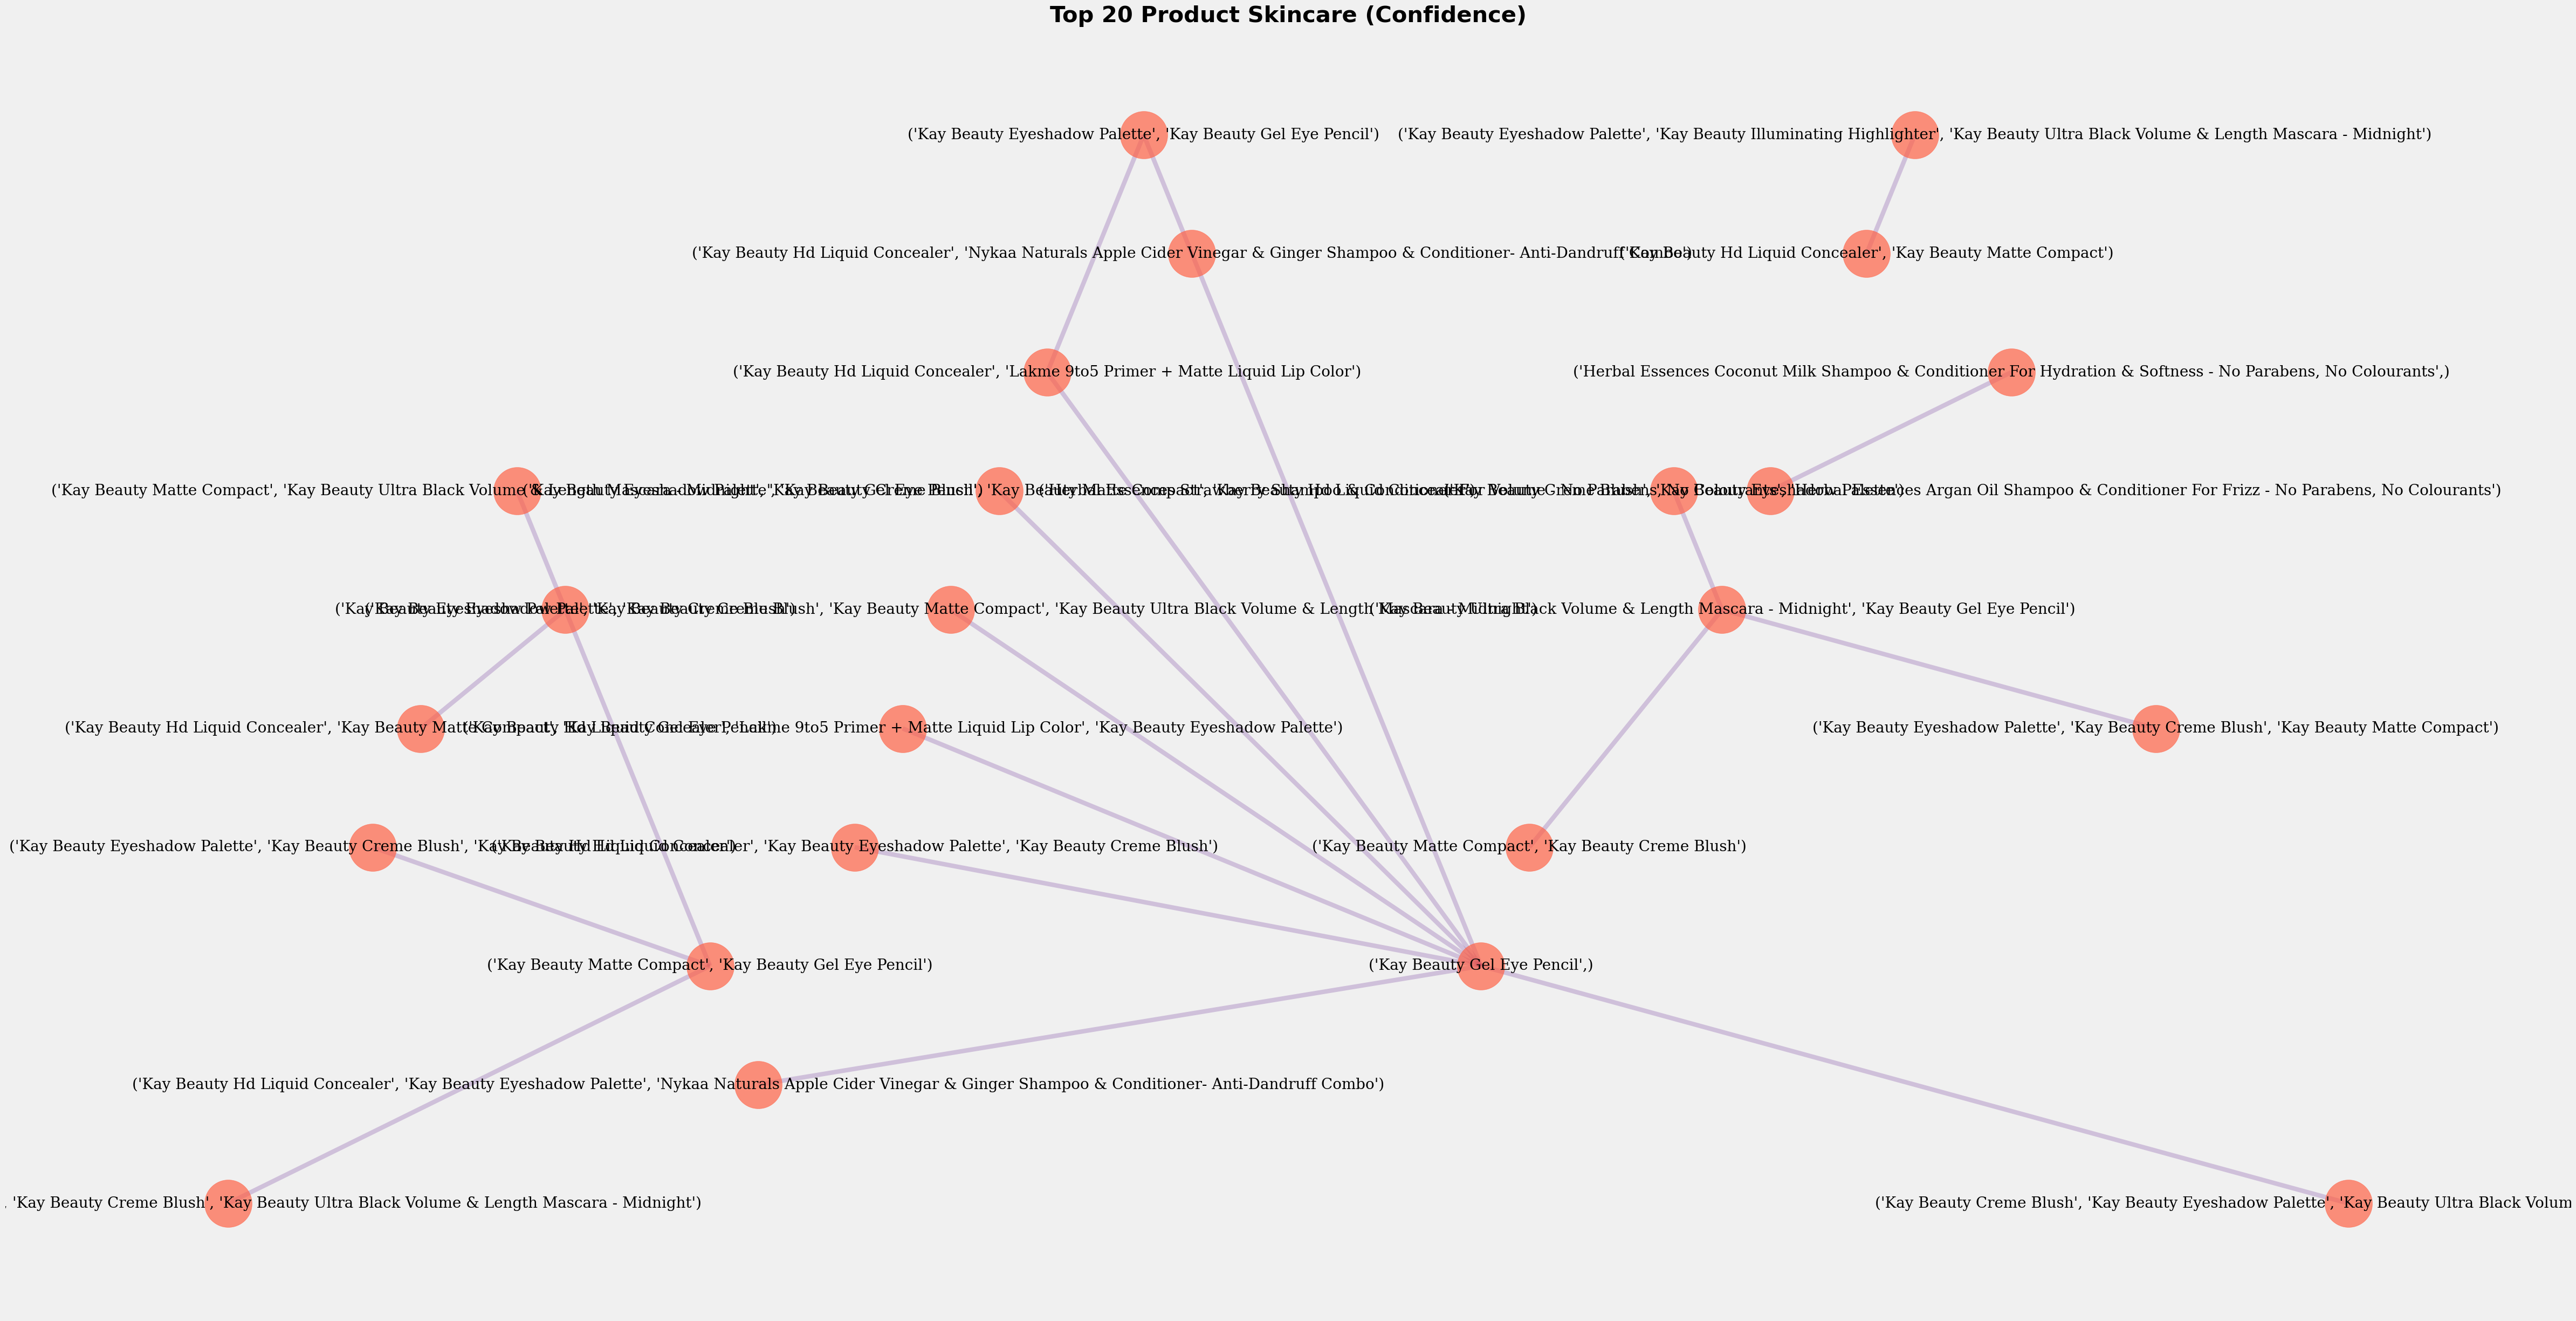

In [58]:
import networkx as nx
import warnings
# konversi frozenset menjadi tuple
rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple(x))
rules['consequents'] = rules['consequents'].apply(lambda x: tuple(x))

# buat graf menggunakan nx.from_pandas_edgelist()
G = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(20),source='antecedents', target='consequents', edge_attr='lift')
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(20),source='antecedents',target='consequents',edge_attr=None)
plt.subplots(figsize=(48,25))
plt.suptitle('Top 20 Product Skincare (Confidence)', fontsize = 30,fontweight = 'bold')
pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 4000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(G, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'serif')
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()